# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key + "&q="
query_url = url + city

city_list = []

for city in cities:
    
    try:
        response = requests.get(url + city).json()
        city_name = response["name"]
        country_name = response["sys"]["country"]
        lon = response["coord"]["lon"]
        lati = response["coord"]["lat"]
        temp = response["main"]["temp"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        city_list.append({"City": city,
                        "Country": country_name,
                        "Longitude": lon,
                        "Latitude": lati,
                        "Temperature": temp,
                        "Max Temperature": max_temp,  
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": wind_speed})
        
        print(f"Processing Record|{city}")
        
    except:
        print("City not found.  Skipping. . .")
    


Processing Record|klaksvik
Processing Record|vostok
Processing Record|cayenne
Processing Record|severo-kurilsk
Processing Record|yellowknife
Processing Record|ushuaia
Processing Record|mabaruma
Processing Record|saint-philippe
Processing Record|castro
Processing Record|vuktyl
Processing Record|askino
Processing Record|san rafael
Processing Record|east london
Processing Record|butaritari
Processing Record|mackenzie
City not found.  Skipping. . .
Processing Record|victoria
Processing Record|atuona
Processing Record|northam
Processing Record|hermanus
Processing Record|mataura
Processing Record|port elizabeth
Processing Record|tabas
Processing Record|faanui
Processing Record|rikitea
Processing Record|barrow
Processing Record|jamestown
Processing Record|rangpur
Processing Record|vila velha
Processing Record|yar-sale
Processing Record|albany
Processing Record|qaanaaq
Processing Record|tuktoyaktuk
Processing Record|bethel
Processing Record|ko samui
City not found.  Skipping. . .
Processing Re

Processing Record|kikwit
Processing Record|gizo
Processing Record|missoula
Processing Record|makakilo city
Processing Record|luganville
Processing Record|tubuala
Processing Record|pemangkat
Processing Record|broken hill
Processing Record|meulaboh
Processing Record|botou
Processing Record|mineros
Processing Record|thinadhoo
Processing Record|northampton
Processing Record|kesan
City not found.  Skipping. . .
City not found.  Skipping. . .
Processing Record|pangnirtung
Processing Record|sjovegan
Processing Record|hovd
Processing Record|maua
Processing Record|umtata
Processing Record|tasiilaq
Processing Record|laguna de perlas
Processing Record|shingu
Processing Record|yala
Processing Record|vao
Processing Record|careiro da varzea
Processing Record|tayturka
Processing Record|puerto narino
Processing Record|fukue
Processing Record|beloha
Processing Record|cidreira
Processing Record|vardo
Processing Record|te anau
Processing Record|mizan teferi
Processing Record|kemijarvi
Processing Record|m

Processing Record|winneba
City not found.  Skipping. . .
Processing Record|port shepstone
Processing Record|babu
Processing Record|saint anthony
Processing Record|mangulile
Processing Record|baykit
City not found.  Skipping. . .
Processing Record|chiredzi
Processing Record|saint-francois
Processing Record|champerico
Processing Record|avera
City not found.  Skipping. . .
Processing Record|san andres
Processing Record|nieuw nickerie
Processing Record|copiapo
Processing Record|vila
Processing Record|baijiantan
Processing Record|bathsheba
Processing Record|igrim
Processing Record|antalaha
Processing Record|wahiawa
Processing Record|kalabo
Processing Record|verkhozim
Processing Record|brewster
Processing Record|blagoyevo
Processing Record|kidal
Processing Record|marsaxlokk
Processing Record|kayerkan
Processing Record|bamnet narong
Processing Record|rovira
Processing Record|pitea
City not found.  Skipping. . .
Processing Record|alihe
Processing Record|rosetta
Processing Record|bani


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list_df = pd.DataFrame(city_list)
city_list_df

,City,Country,Longitude,Latitude,Temperature,Max Temperature,Humidity,Cloudiness,Wind Speed
0,klaksvik,FO,-6.5890,62.2266,24.80,24.80,86,20,1.14
1,vostok,RU,135.8833,46.4856,15.57,15.57,92,3,2.82
2,cayenne,GF,-52.3333,4.9333,75.20,75.20,100,90,2.30
3,severo-kurilsk,RU,156.1250,50.6789,27.75,27.75,92,100,20.31
4,yellowknife,CA,-114.3525,62.4560,-11.20,-11.20,77,20,4.61
...,...,...,...,...,...,...,...,...,...
570,rovira,CO,-75.2400,4.2392,69.87,69.87,77,100,4.79
571,pitea,SE,21.4794,65.3172,6.80,6.80,92,56,6.91
572,alihe,CN,123.7167,50.5667,13.59,13.59,92,97,3.06
573,rosetta,EG,30.4164,31.4044,51.80,51.80,93,0,2.30


In [5]:
city_list_df.to_csv("WeatherPy.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

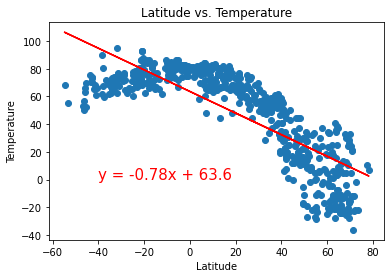

In [12]:
lat_x = city_list_df["Latitude"]
temp_y = city_list_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_x, temp_y)
regress_values = lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_x, temp_y)
plt.plot(lat_x,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

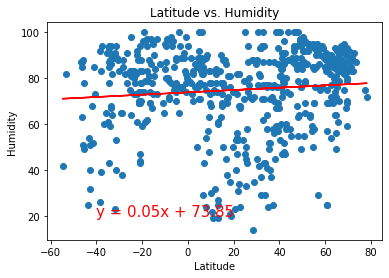

In [14]:
lat_x = city_list_df["Latitude"]
humidity_y = city_list_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_x, humidity_y)
regress_values = lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_x, humidity_y)
plt.plot(lat_x,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

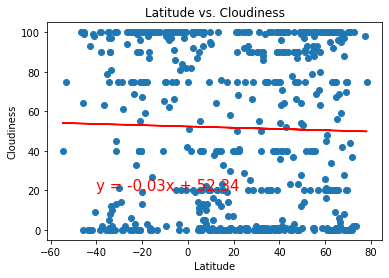

In [15]:
lat_x = city_list_df["Latitude"]
cloudiness_y = city_list_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_x, cloudiness_y)
regress_values = lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_x, cloudiness_y)
plt.plot(lat_x,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

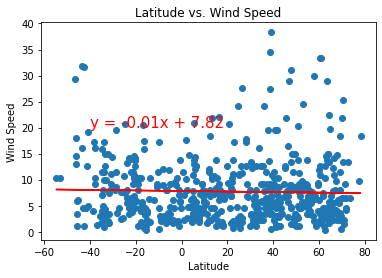

In [16]:
lat_x = city_list_df["Latitude"]
wind_speed_y = city_list_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_x, wind_speed_y)
regress_values = lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_x, wind_speed_y)
plt.plot(lat_x,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

## Linear Regression

In [29]:
northern_hemisphere = city_list_df.query("Latitude>0")
southern_hemisphere = city_list_df.query("Latitude<0")
len(northern_hemisphere)

403

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Max Temp vs. Latitude')

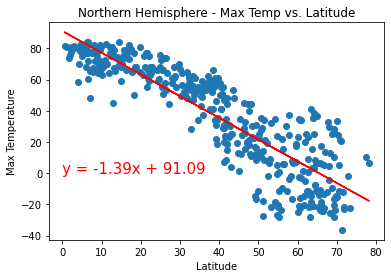

In [31]:
northern_temp = northern_hemisphere["Max Temperature"]
northern_lat = northern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_temp)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_temp)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude')

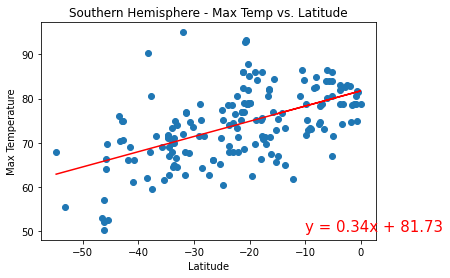

In [33]:
southern_temp = southern_hemisphere["Max Temperature"]
southern_lat = southern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_temp)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_temp)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Humidity(%) vs. Latitude')

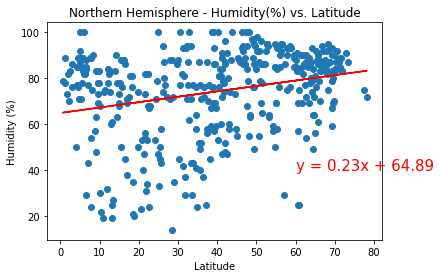

In [35]:
northern_humidity = northern_hemisphere["Humidity"]
northern_lat = northern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_humidity)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Humidity(%) vs. Latitude')

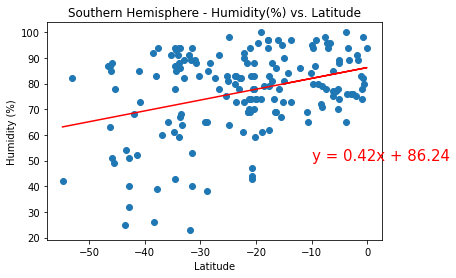

In [36]:
southern_humidity = southern_hemisphere["Humidity"]
southern_lat = southern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_humidity)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness(%) vs. Latitude')

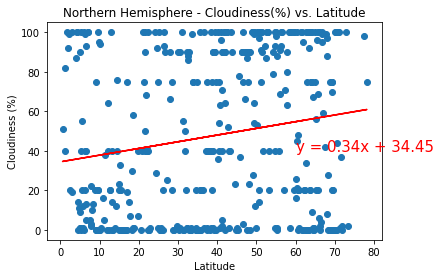

In [39]:
northern_cloudiness = northern_hemisphere["Cloudiness"]
northern_lat = northern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_cloudiness)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness(%) vs. Latitude')

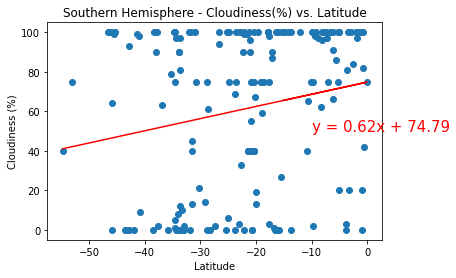

In [40]:
southern_cloudiness = southern_hemisphere["Cloudiness"]
southern_lat = southern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_cloudiness)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed(mph) vs. Latitude')

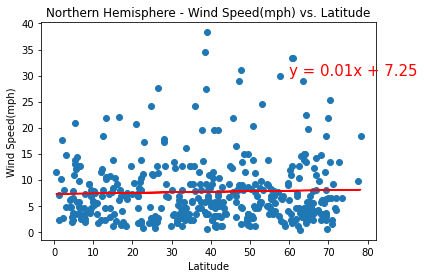

In [43]:
northern_speed = northern_hemisphere["Wind Speed"]
northern_lat = northern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_speed)
regress_values = northern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_lat, northern_speed)
plt.plot(northern_lat,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed(mph) vs. Latitude')

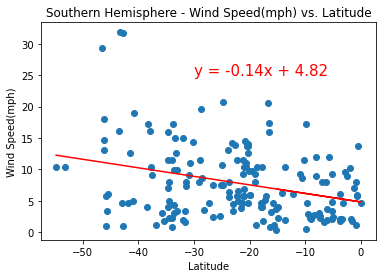

In [45]:
southern_speed = southern_hemisphere["Wind Speed"]
southern_lat = southern_hemisphere["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_speed)
regress_values = southern_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_lat, southern_speed)
plt.plot(southern_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")